## Coding Assignment 6: Linear Regression Modeling [SOLUTIONS]

### Introduction to Data Science
#### Last Updated: November 19, 2022

---

### Skills Assessed

You will demonstrate these skills in the HW:
- Identifying features that could introduce bias into a model
- Fitting a linear regression model with `sklearn`
- Measuring model fit

---

### Instructions

You will work with the Online News Popularity Data Set in this assignment to conduct a regression task.

The dataset contains a set of features about articles published by Mashable over a two-year period.  
The goal is to predict the number of shares in social networks (popularity).

Link to project:  
https://archive.ics.uci.edu/ml/datasets/Online+News+Popularity

To get the data, click on the `Data Folder` at the top (next to *Download*).  
Next, click OnlineNewsPopularity.zip and unzip the data.  
Find the file named `OnlineNewsPopularity.csv` and load it into Python.


**TOTAL POINTS: 12**

---

import packages

In [58]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score # R-squared

import pandas as pd
import seaborn as sns

parameters

In [12]:
datapath = 'C:/Users/apt4c/Downloads/OnlineNewsPopularity/OnlineNewsPopularity/OnlineNewsPopularity.csv'
target = 'shares'

import the data

In [13]:
df = pd.read_csv(datapath)
df.head(3)

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.5,-0.1875,0.0,0.1875,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.0,0.0000,0.5,0.0000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.0,0.0000,0.5,0.0000,1500


Print out the columns. You might notice some contain a space. This can cause an issue, so remove the spaces.  

In [21]:
df.columns

Index(['url', 'timedelta', 'n_tokens_title', 'n_tokens_content',
       'n_unique_tokens', 'n_non_stop_words', 'n_non_stop_unique_tokens',
       'num_hrefs', 'num_self_hrefs', 'num_imgs', 'num_videos',
       'average_token_length', 'num_keywords', 'data_channel_is_lifestyle',
       'data_channel_is_entertainment', 'data_channel_is_bus',
       'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world', 'kw_min_min', 'kw_max_min', 'kw_avg_min',
       'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg',
       'kw_avg_avg', 'self_reference_min_shares', 'self_reference_max_shares',
       'self_reference_avg_sharess', 'weekday_is_monday', 'weekday_is_tuesday',
       'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday',
       'weekday_is_saturday', 'weekday_is_sunday', 'is_weekend', 'LDA_00',
       'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity',
       'global_sentiment_polarity', 'global_rate_positive_words',
     

In [22]:
# use a list comprehension to strip spaces

df.columns = [col.strip() for col in df.columns]
df.columns

Index(['url', 'timedelta', 'n_tokens_title', 'n_tokens_content',
       'n_unique_tokens', 'n_non_stop_words', 'n_non_stop_unique_tokens',
       'num_hrefs', 'num_self_hrefs', 'num_imgs', 'num_videos',
       'average_token_length', 'num_keywords', 'data_channel_is_lifestyle',
       'data_channel_is_entertainment', 'data_channel_is_bus',
       'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world', 'kw_min_min', 'kw_max_min', 'kw_avg_min',
       'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg',
       'kw_avg_avg', 'self_reference_min_shares', 'self_reference_max_shares',
       'self_reference_avg_sharess', 'weekday_is_monday', 'weekday_is_tuesday',
       'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday',
       'weekday_is_saturday', 'weekday_is_sunday', 'is_weekend', 'LDA_00',
       'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity',
       'global_sentiment_polarity', 'global_rate_positive_words',
     

**1. Produce a histogram of the target variable: `shares` (1 PT)**

<AxesSubplot:xlabel='shares', ylabel='Count'>

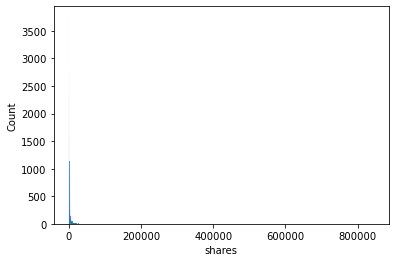

In [35]:
sns.histplot(df[target])

**2. Why is the histogram hard to visualize? Do you have any ideas to improve it? (1 PT)**

In [27]:
df[target].describe()

count     39644.000000
mean       3395.380184
std       11626.950749
min           1.000000
25%         946.000000
50%        1400.000000
75%        2800.000000
max      843300.000000
Name: shares, dtype: float64

There are some very large values for `share`. They could be excluded from the plot, or placed into a separate plot.

In [38]:
# compute the 95th percentile
df[target].quantile(.95)

10800.0

Plot the histogram for values less than 10000 shares.

In [ ]:
sns.histplot(df[target][df[target] < 10000])

Read about the attribute information on the [project page](https://archive.ics.uci.edu/ml/datasets/Online+News+Popularity) to get a sense of which predictors might be useful.

**3. Compute the correlation between the variables. This may help identify useful predictors. Which two variables have the highest correlation with shares? It will help to sort the correlations after computing them. (1 PT)**

Hint: You can select the `shares` column from the correlation matrix and then sort by that column.

In [44]:
df.corr()[target].sort_values(ascending = False)

shares                           1.000000
kw_avg_avg                       0.110413
LDA_03                           0.083771
kw_max_avg                       0.064306
self_reference_avg_sharess       0.057789
self_reference_min_shares        0.055958
self_reference_max_shares        0.047115
num_hrefs                        0.045404
kw_avg_max                       0.044686
kw_min_avg                       0.039551
num_imgs                         0.039388
global_subjectivity              0.031604
kw_avg_min                       0.030406
kw_max_min                       0.030114
abs_title_sentiment_polarity     0.027135
num_videos                       0.023936
title_subjectivity               0.021967
num_keywords                     0.021818
is_weekend                       0.016958
weekday_is_saturday              0.015082
title_sentiment_polarity         0.012772
avg_positive_polarity            0.012142
max_positive_polarity            0.010068
weekday_is_monday                0

answer: `kw_avg_avg`, `LDA_03`

**4. The two variables with highest correlation from Part 3 will be used as predictors.  
Call `describe()` on the predictor variables. Notice the variables are on very different scales. (1 PT)**

In [52]:
df[['kw_avg_avg','LDA_03']].describe()

,kw_avg_avg,LDA_03
count,39644.000000,39644.000000
mean,3135.858639,0.223770
std,1318.150397,0.295191
min,0.000000,0.000000
25%,2382.448566,0.028571
50%,2870.074878,0.040001
75%,3600.229564,0.375763
max,43567.659946,0.926534


**5. Prepare the data for regression:**   

Create a variable X which holds the predictor values.    
Create a variable y which holds the target values.

Print the first five records from X and y. **(1 PT)**

In [56]:
X = df[['kw_avg_avg','LDA_03']].values
y = df[target].values

print('X:', X[:5])
print('')
print('y:', y)

X: [[0.         0.04126265]
 [0.         0.05010067]
 [0.         0.03333354]
 [0.         0.02890472]
 [0.         0.02857168]]

y: [ 593  711 1500 ... 1900 1100 1300]


**6. Split X and y into a train set (80% of records) and a test set (20%).  For the seed, use `random_state=314`  
Print the number of records in `x_train`, `x_test`, `y_train`, `y_test` (1 PT)**

In [59]:
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state=314)

In [62]:
print(len(x_train), len(x_test), len(y_train), len(y_test))

31715 7929 31715 7929


**7a. Recall the predictors are on different scales.  
Scale `x_train` and print the first 5 records. (1 PT)**  

In [65]:
scaler = StandardScaler()
x_train_s = scaler.fit_transform(x_train)
print(x_train_s[:5])

[[ 0.40056601 -0.68654554]
 [-0.24072514 -0.68143459]
 [-0.84406125 -0.64362625]
 [-0.14840235 -0.6424318 ]
 [-0.63862975 -0.68864937]]


**7b. After scaling, what happened to the zeros in the first predictor? Explain. (1 PT)**  
Hint: think about how scaling works.

Scaling centers the data, which subtracts the mean. Since the mean is non-zero, we subtract a non-zero number from the zeros, which results in scaled values which are non-zero. 

**8. Fit a linear regression model to the data. Use the scaled data as predictors.  Print the coefficients and the intercept. (1 PT)**

In [66]:
reg = LinearRegression().fit(x_train_s, y_train)

In [69]:
reg.coef_

array([1082.66588059,  528.87759245])

In [70]:
reg.intercept_

3416.1085921488248

**9. Predictions on test set**  
First, scale `x_test`, reusing the scaler from the training data.  Call this variable `x_test_s`

In [71]:
x_test_s = scaler.fit_transform(x_test)

Next, feed `x_test_s` into the model to predict `y_test`, calling this `y_test_predicted`

In [73]:
y_test_predicted = reg.predict(x_test_s)

Make a scatterplot with `y_test_predicted` on the x-axis and `y_test` on the y-axis.  
If the model fit well, `y_test_predicted` would match `y_test`.  
Based on the plot, does the model seem to fit well? Explain why or why not. **(1 PT)**

<AxesSubplot:>

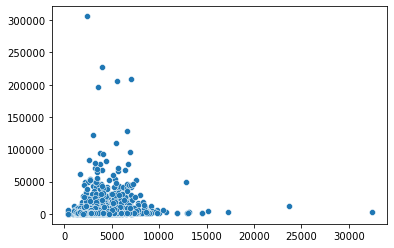

In [74]:
sns.scatterplot(x=y_test_predicted, y=y_test)

The model fit is very poor. There is little relationship between the predictions and targets.  
There are some very large outliers where the prediction is large while the target is small, and vice versa.

**10. Compute the R-squared of the model and print it.**  
What does the R-squared tell you about the fit? Does this agree with your answer based on the graph? **(1 PT)**

In [81]:
print(r2_score(y_test, y_test_predicted))

0.020141250586068415


The R-squared is nearly zero, which indicates that the model explains nearly none of the variability in shares.  
This agrees with the conclusion based on the graph.

**11. Avoiding biased predictors (1 PT)**


This question is independent of the earlier task.  
Which of these variables would be problematic - and should be excluded from modeling - as they might discriminate among protected individuals?  Enter the letter corresponding to each such variable.

A) `is_disabled` : indicator of disability  
B) `is_female`   : indicator of female  
C) `has_iphone`  : indicator that subject has an iphone  
D) `age_over_65` : indicator that subject age is greater than 65

A, B, D - these are all problematic  

C is not problematic.

---